In [10]:
import numpy as np
import string
import requests
import os
import random
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')
import textwrap

In [11]:
# Markov laguage model initization

M = np.ones((26,26))

pi = np.zeros(26)

In [12]:
# Initialzing english alphabets

letters1 = list(string.ascii_lowercase)
letters2 = list(string.ascii_lowercase)

random.shuffle(letters2)

true_mapping = {}

for k , v in zip(letters1, letters2):
    
    true_mapping[k] = v
    

In [13]:
print(true_mapping)

{'a': 'o', 'b': 'l', 'c': 'i', 'd': 'e', 'e': 'f', 'f': 'u', 'g': 'p', 'h': 'j', 'i': 'h', 'j': 'a', 'k': 'y', 'l': 'q', 'm': 'g', 'n': 'm', 'o': 'c', 'p': 'r', 'q': 'x', 'r': 'v', 's': 'b', 't': 't', 'u': 'n', 'v': 's', 'w': 'w', 'x': 'k', 'y': 'z', 'z': 'd'}


In [14]:
# Creating function to update the language model with Markov model

def transition_state(ch1,ch2):
    i = ord(ch1) - 97
    j = ord(ch2) - 97
    M[i,j] += 1
    
def emmision_state(ch):
    i = ord(ch) - 97
    pi[i] += 1
    
    
# Now calculating using probabilitic approach in logarithmic value


def get_word_prob(word):
    
    i = ord(word[0]) - 97
    logp = np.log(pi[i])
    
    for w in word[1:]:
        
        j = ord(w) - 97
        
        logp += np.log(M[i,j])
        
        i = j
        
    return logp


def sequence_of_words(words):
    
    if type(words) == str:
        words = words.split()
        
    logp = 0
    
    for word in words:
        
        logp += get_word_prob(word)
        
        
    return logp

In [15]:
# p(a,b) = p(a)*p(b|a)

# log(p(a,b)) = log(p(a)*p(b|a))

# log(p(a,b)) = log(p(a)) + log(p(b|a))

In [16]:
# Loading text corpus 


regex = re.compile('[^a-zA-Z]')


for line in open('sholmes.txt'):
    line = line.rstrip()
    
    if line:
        
        line = regex.sub(' ', line) # Replace space with text
        
        tokens = line.lower().split()
        
        for token in tokens:
            
            # First Letter
            ch = token[0]
            emmision_state(ch)
            
            # For Others
            for ch1 in token[1:]:
                
                transition_state(ch,ch1)
                
                ch = ch1     

In [17]:
# Calculating probabilites(Normalizing)

M /= M.sum(axis = 1, keepdims = True)

pi /= pi.sum()

In [18]:
# Encoding message and then decoding


original_message = '''My cabby drove fast. I don't think I ever drove faster, but the others
were there before us. The cab and the landau with their steaming horses
were in front of the door when I arrived. I paid the man and hurried
into the church. There was not a soul there save the two whom I had
followed and a surpliced clergyman, who seemed to be expostulating with
them. They were all three standing in a knot in front of the altar. I
lounged up the side aisle like any other idler who has dropped into a
church. Suddenly, to my surprise, the three at the altar faced round to
me, and Godfrey Norton came running as hard as he could towards me.
'''

In [19]:
# Encoding message

def encode_message(message):
    
    message = message.lower()
    
    message = regex.sub(" ",message)
    
    coded_msg = []
    
    for ch in message:
        coded_ch = ch
        if ch in true_mapping:
            coded_ch = true_mapping[ch]
        
        coded_msg.append(coded_ch)
            
            
    return ''.join(coded_msg)      
    
            
encoded_message = encode_message(original_message)

In [20]:
print(encoded_message)

gz iollz evcsf uobt  h ecm t tjhmy h fsfv evcsf uobtfv  lnt tjf ctjfvb wfvf tjfvf lfucvf nb  tjf iol ome tjf qomeon whtj tjfhv btfoghmp jcvbfb wfvf hm uvcmt cu tjf eccv wjfm h ovvhsfe  h rohe tjf gom ome jnvvhfe hmtc tjf ijnvij  tjfvf wob mct o bcnq tjfvf bosf tjf twc wjcg h joe ucqqcwfe ome o bnvrqhife iqfvpzgom  wjc bffgfe tc lf fkrcbtnqothmp whtj tjfg  tjfz wfvf oqq tjvff btomehmp hm o ymct hm uvcmt cu tjf oqtov  h qcnmpfe nr tjf bhef ohbqf qhyf omz ctjfv heqfv wjc job evcrrfe hmtc o ijnvij  bneefmqz  tc gz bnvrvhbf  tjf tjvff ot tjf oqtov uoife vcnme tc gf  ome pceuvfz mcvtcm iogf vnmmhmp ob jove ob jf icnqe tcwoveb gf  


In [21]:
# Function to decode

def decode_message(message, word_map):
    
    decoded_msg =[]
    
    for ch in message:
        decoded_ch = ch
        
        if ch in word_map:
            
            decoded_ch = word_map[ch]
            
        decoded_msg.append(decoded_ch)
        
        
    return ''.join(decoded_msg)

In [22]:
# Using DNA Evolutionary algorithm to find the actual word map and decode the message


dna_pool = []

for _ in range(20):
    dna = list(string.ascii_lowercase)
    random.shuffle(dna)
    dna_pool.append(dna)
    
    
def offspring_creation(dna_pool, n_children):
    
    offspring = []
    
    for dna in dna_pool:
        for _ in range(n_children):
            copy = dna.copy()
            j = np.random.randint(len(copy))
            k = np.random.randint(len(copy))
            
            # Switch/Swap
            
            tmp = copy[j]
            
            copy[j] = copy[k]
            
            copy[k] = tmp
            
            offspring.append(copy)

    return offspring + dna_pool



In [23]:
num_iters = 1000

scores = np.zeros(num_iters)

best_map = None

best_score = float('-inf')

best_dna = None


for i in range(num_iters):
    
    if i > 0:
        
        dna_pool = offspring_creation(dna_pool,3)
        
    dna2score = {}
    
    for dna in dna_pool:
        current_map = {}
        
        for k , v in zip(letters1, dna):
            
            current_map[k] = v
            
        decoded_message = decode_message(encoded_message, current_map)
        score = sequence_of_words(decoded_message)
        
        
        dna2score[''.join(dna)] = score
        
        if score > best_score:
            best_dna = dna
            best_map = current_map
            best_score = score
            
    scores[i] = np.mean(list(dna2score.values()))
    
    # keep the best 5 dna
    # also turn them back into list of single chars
    sorted_dna = sorted(dna2score.items(), key=lambda x: x[1], reverse=True)
    dna_pool = [list(k) for k, v in sorted_dna[:5]]
    
    
    if i % 200 == 0:
        print("iter:", i, "score:", scores[i], "best so far:", best_score)

iter: 0 score: -2754.6221323184227 best so far: -2448.2956401725373
iter: 200 score: -1309.9362664981445 best so far: -1183.6663478139778
iter: 400 score: -1274.841457986445 best so far: -1129.482429601682
iter: 600 score: -1270.3197955237083 best so far: -1129.482429601682
iter: 800 score: -1282.2409416504165 best so far: -1129.482429601682


In [257]:
# Use best score

decoded_message = decode_message(encoded_message, best_map)


print("decoded message:",sequence_words_prob(decoded_message))
print("True message:",sequence_words_prob(regex.sub('',original_message.lower())))



# Letters wrong predicted

for true, v in true_mapping.items():
    pred = best_map[v]
    if true != pred:
        print("True: %s, Pred: %s" %(true,pred))

decoded message: -1129.482429601682
True message: -1269.7788046428575
True: j, Pred: z
True: q, Pred: j
True: z, Pred: q


In [258]:
# print the final decoded message

print("Decoded message:\n", textwrap.fill(decoded_message))

print("\nTrue message:\n", original_message)

Decoded message:
 my cabby drove fast  i don t think i ever drove faster  but the others
were there before us  the cab and the landau with their steaming
horses were in front of the door when i arrived  i paid the man and
hurried into the church  there was not a soul there save the two whom
i had followed and a surpliced clergyman  who seemed to be
expostulating with them  they were all three standing in a knot in
front of the altar  i lounged up the side aisle like any other idler
who has dropped into a church  suddenly  to my surprise  the three at
the altar faced round to me  and godfrey norton came running as hard
as he could towards me

True message:
 My cabby drove fast. I don't think I ever drove faster, but the others
were there before us. The cab and the landau with their steaming horses
were in front of the door when I arrived. I paid the man and hurried
into the church. There was not a soul there save the two whom I had
followed and a surpliced clergyman, who seemed to be ex

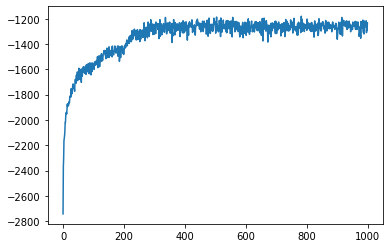

In [259]:
plt.plot(scores)
plt.show()